# Practice 5. Monte Carlo Simulation 

### 1. 기대값  
연속형 확률변수 $X\sim N(\mu, \sigma^2)$가 $(a,b),~ -\infty<a<b<\infty$ 구간에 존재한다고 하자. 이 때 $X, a<X<b$를 truncated normal distribution을 가진다고 한다. $\mu=-8, \sigma=2, a=-10, b=10$인 경우 truncated normal distribution을 따르는 확률변수의 기대값을 Monte Carlo Simulation을 통해 구하시오. 

(참고) 연속형 확률변수의 기대값은 아래와 같이 정의된다. 
$$E(X) = \int x f(x) dx $$

https://en.wikipedia.org/wiki/Truncated_normal_distribution

In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mu=-8
sigma = 2
x = stats.norm.rvs(mu, sigma,size = 100000)
a = -10
b = 10

In [2]:
x.shape

(100000,)

In [3]:
x.mean()

-7.992852129380375

In [4]:
[x_ for x_ in x if a < x_ < b]

[-4.5154428573041905,
 -4.3783167366756715,
 -7.435733429023626,
 -5.9116137345614375,
 -8.977851709650022,
 -9.482066884638579,
 -5.997289812821734,
 -7.539158536577711,
 -7.070179453253108,
 -5.331152239585348,
 -7.525243333919006,
 -8.120066876085016,
 -8.184264577473478,
 -8.07260915894082,
 -8.565171998383008,
 -7.627678820661426,
 -6.085294750456297,
 -6.685477298737528,
 -8.044623082868918,
 -8.389297809271632,
 -8.339970098909216,
 -6.555117100988751,
 -8.143918242902743,
 -8.320772551021129,
 -5.0196282030486685,
 -6.287788414481918,
 -6.781828445578563,
 -7.224186781306759,
 -8.417207615599768,
 -9.107953024390037,
 -5.716686737829723,
 -4.788158328579386,
 -9.738709148024862,
 -5.354674404944998,
 -7.556164933159955,
 -8.328280991516449,
 -7.303636246139137,
 -8.398683488100252,
 -5.879960697015448,
 -9.576328585505212,
 -7.961389154920483,
 -8.305106211459487,
 -6.240267444884158,
 -8.115005624446775,
 -8.632779838206272,
 -6.71638149781484,
 -5.827053885293118,
 -2.1138369

In [5]:
np.mean([x_ for x_ in x if a < x_ < b]) # MC를 통한 기댓값

-7.4199806005303985

In [6]:
# 이론적인 기댓값

alpha = (a - mu) / sigma
beta = (b - mu) / sigma
Z = stats.norm.cdf(beta) - stats.norm.cdf(alpha)

In [7]:
mu + ((stats.norm.pdf(alpha) - stats.norm.pdf(beta)) / Z) * sigma

-7.424800058121643

### 2.  Sales Comission 
한 회사에서는 판매원들에게 Sales commission을 제공함으로써 판매를 촉진하고 있다. 내년의 예산 계획을 위핸 Sales comission의 기대값을 구하고자 한다.  Sale comission rate은 판매 목표 달성률에 따라 아래와 같이 책정된다. 
<img src=https://pbpython.com/images/Excel_Table_4.png>

Sales commission이 계산되는 예는 아래와 같다.
<img src=https://pbpython.com/images/Excel_Table_5.png>
<img src=https://pbpython.com/images/Excel_Table_6.png>

지금까지의 기록을 보았을 때 판매 목표 달성률은 평균 1, 표준편차 0.1인 대칭 분포를 가지고 있었다. 따라서 해당 정규분포에서 각 판매원의 판매 목표 달성률을 발생시킨다. 

In [8]:
avg = 1 # 평균
std_dev = .1 # 표준편차
num_reps = 500 # 500명을 대상으로
num_simulations = 1000
pct_to_target = stats.norm.rvs(avg, std_dev, size = num_reps) # 500명에 대한 값이 필요




In [9]:
pct_to_target

array([0.93556092, 1.01639945, 1.03911704, 1.01804075, 1.02438152,
       0.98487792, 0.96800853, 0.91610419, 1.07631415, 0.91123901,
       1.03013303, 1.04497023, 1.02119776, 1.06076516, 1.03533613,
       0.90264851, 0.9858543 , 1.0436124 , 1.13896746, 1.07212832,
       0.87548509, 1.15155565, 0.9055084 , 0.87347634, 1.10350158,
       0.86559067, 0.97536418, 1.06310055, 1.13377315, 0.9396241 ,
       0.94036094, 0.95867387, 1.06360121, 0.96482871, 0.85038123,
       0.95830194, 1.03950659, 1.10182579, 0.94099459, 0.85582208,
       0.97653469, 0.93055412, 0.798263  , 1.05636974, 0.86392275,
       1.12415486, 0.88982381, 1.05539684, 1.08067437, 0.99437017,
       0.93883048, 1.18082565, 1.00081921, 0.96401834, 1.17749061,
       0.9890865 , 1.15453193, 1.06869913, 1.00315393, 0.88139335,
       1.0843283 , 0.98620397, 1.07051748, 1.20851267, 0.92800982,
       0.97675993, 0.98001093, 1.07624934, 1.08009322, 0.94888005,
       0.95704311, 0.87337238, 0.85582491, 1.28289987, 0.97070

기록을 통해 Sales target은 아래의 분포를 가지고 있음을 확인하였다. 따라서 아래의 확률분포를 가진 이산형 확률변수의 값을 Sales target으로 발생시킨다. 


| Sales Target| Proportion |
|---------|------|
| 75,000  | 0.3  |
| 100,000 | 0.3  |
| 200,000 | 0.2  |
| 300,000 | 0.1  |
| 400,000 | 0.05 |
| 500,000 | 0.05 |

In [10]:
# 500명의 sales_target을 발생

In [11]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p = sales_target_prob)

In [12]:
sales_target

array([100000, 100000, 200000, 400000, 100000, 500000, 500000, 200000,
       100000, 200000, 100000, 100000, 300000, 200000,  75000,  75000,
       100000, 100000, 200000, 500000, 500000, 300000, 300000, 400000,
       100000,  75000, 400000, 100000, 100000, 100000, 100000,  75000,
       200000, 300000, 300000, 400000, 100000,  75000,  75000,  75000,
        75000, 100000, 100000, 100000, 100000, 400000,  75000, 100000,
       200000,  75000, 100000, 100000, 100000, 100000, 400000, 200000,
       200000,  75000, 100000, 100000, 300000, 100000, 500000, 100000,
        75000, 300000,  75000,  75000, 500000,  75000, 500000, 500000,
        75000, 100000,  75000, 500000, 100000,  75000, 200000, 100000,
       200000, 500000,  75000, 500000,  75000, 100000, 100000, 200000,
        75000,  75000, 300000, 200000, 100000, 500000, 100000, 400000,
       100000, 100000, 100000, 100000, 100000, 200000, 400000, 300000,
        75000, 500000,  75000, 100000, 300000, 200000, 400000,  75000,
      

In [13]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})
df.head()

,Pct_To_Target,Sales_Target
0,0.935561,100000
1,1.016399,100000
2,1.039117,200000
3,1.018041,400000
4,1.024382,100000


In [14]:
df['Sales'] = df['Pct_To_Target'] * df['Sales_Target'] # 판매량

In [15]:
df.head()

,Pct_To_Target,Sales_Target,Sales
0,0.935561,100000,93556.091660
1,1.016399,100000,101639.945209
2,1.039117,200000,207823.407671
3,1.018041,400000,407216.299563
4,1.024382,100000,102438.152322


Commision rate의 계산을 위한 함수 

In [16]:
def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [17]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [18]:
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,0.935561,100000,93556.091660,0.03,2806.682750
1,1.016399,100000,101639.945209,0.04,4065.597808
2,1.039117,200000,207823.407671,0.04,8312.936307
3,1.018041,400000,407216.299563,0.04,16288.651983
4,1.024382,100000,102438.152322,0.04,4097.526093


- 500명의 sales를 계산한 하나의 샘플을 진행했으므로, 반복 진행 필요

Monte Carlo Simulation을 통해 총 commision amount를 계산하고 이 값의 분포와 평균을 관찰한다. 

In [19]:
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

# Loop through many simulations
for i in range(num_simulations):

    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

In [20]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])

In [21]:
results_df.head()

,Sales,Commission_Amount,Sales_Target
0,90401250.0,3100472.0,90150000
1,88383250.0,3062078.0,88300000
2,86062750.0,2902878.0,86625000
3,83464000.0,2773328.0,84300000
4,87727250.0,3024060.0,87425000


In [22]:
results_df.shape

(1000, 3)

#### Commission amount의 분포를 히스토그램으로 그리시오. 

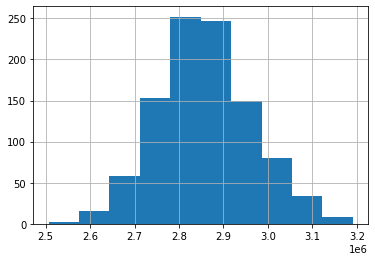

In [23]:
results_df.Commission_Amount.hist()
plt.show()

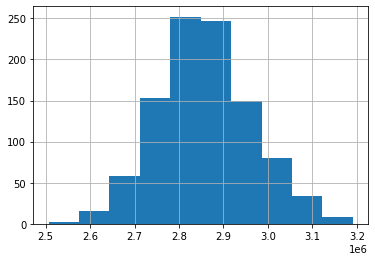

In [24]:
results_df['Commission_Amount'].hist()
plt.show()

#### Commission amount의 기대값은 무엇인가? 내년 예산 반영을 위해 보수적으로 75 pecentile을 사용한다면 얼마를 예산으로 잡아야 하는가?

In [25]:
results_df.describe().style.format('{:.0f}')

,Sales,Commission_Amount,Sales_Target
count,1000,1000,1000
mean,83718578,2858450,83727075
std,2785102,106538,2735077
min,76131750,2506435,75900000
25%,81816938,2787520,81925000
50%,83657125,2854510,83650000
75%,85411250,2926882,85425000
max,91918250,3191192,91375000


In [26]:
# 기댓값 (mean): 2857450
# 75%: 2922724

In [27]:
# mean = 2857450

#### 만일 Top commission rate 을 5%로 올린다면 commission amount의 기대값은 어떻게 변하는가? 

In [28]:
def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .05 # .04 to .05

In [29]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [30]:
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

# Loop through many simulations
for i in range(num_simulations):

    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

In [31]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])

In [32]:
results_df.describe().style.format('{:.0f}')

,Sales,Commission_Amount,Sales_Target
count,1000,1000,1000
mean,83808027,3328944,83809300
std,2694955,129095,2645198
min,75593750,2908382,75675000
25%,82014250,3247418,82050000
50%,83732000,3328535,83750000
75%,85581438,3412707,85581250
max,92940000,3708570,93350000


In [33]:
# mean = 3330934

#### 만일 판매원의 수가 300명으로 줄어든다면 commission amount의 기대값은 어떻게 변하는가? 

In [34]:
# num_reps = 500 to 300

In [35]:
avg = 1 # 평균
std_dev = .1 # 표준편차
num_reps = 300 # 300명을 대상으로
num_simulations = 1000
pct_to_target = stats.norm.rvs(avg, std_dev, size = num_reps) # 500명에 대한 값이 필요

In [36]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p = sales_target_prob)

In [37]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})
df['Sales'] = df['Pct_To_Target'] * df['Sales_Target'] # 판매량

In [38]:
def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [39]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [40]:
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

# Loop through many simulations
for i in range(num_simulations):

    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

In [41]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])

In [42]:
results_df.describe().style.format('{:.0f}')

,Sales,Commission_Amount,Sales_Target
count,1000,1000,1000
mean,50187314,1714602,50168475
std,2020341,77515,1979149
min,43681750,1459308,43925000
25%,48796688,1661764,48793750
50%,50083625,1710442,50050000
75%,51503188,1764892,51450000
max,56658500,1973670,56675000


In [43]:
# mean = 1714611

### 3. Rejection Sampling 

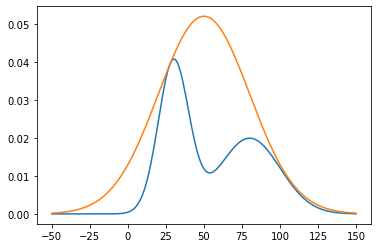

In [44]:
def p(x):
    return stats.norm.pdf(x, loc=30, scale=10) + stats.norm.pdf(x, loc=80, scale=20)


def q(x):
    return stats.norm.pdf(x, loc=50, scale=30)


x = np.arange(-50, 151)
M = max(p(x) / q(x)) # p(x) <= M*q(x)

plt.plot(x, p(x))
plt.plot(x, M*q(x))
plt.show()

- p(x)를 샘플링하고 싶은데 쉽지 않아서 q(x)를 통해 샘플링

In [45]:
iter=100000
samples = []

for i in range(iter):
    y = np.random.normal(50, 30) # 1. q에서 y 생성
    u = np.random.uniform(0,1) # 2. uniform(0,1)에서 u 생성
    
    if u <= p(y)/(M*q(y)): # 3. 조건을 만족시키면 sample로 채택 -> u의 확률로 채택하겠다는 의미
        samples.append(y)

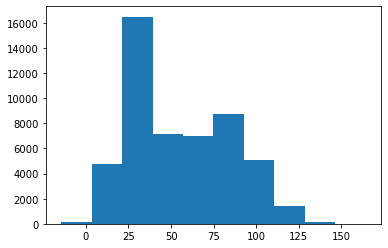

In [46]:
plt.hist(samples)
plt.show()

##### Reference
https://pbpython.com/monte-carlo.html